# Analyzing prepaid plans for telecom

Our project is to prepare a report for telecom operator Megaline. We need to find out which of the two plans brings in more revenue in order to adjust the advertising budget. The commersial department already has some data on Megaline clients.

Our report will be considered after analysis of clients' behavior and determine which prepaid plan brings in more revenue

We need to test the following hypothesises:

•	The average revenue from users of Ultimate and Surf calling plans differs.

•	The average revenue from users in NY-NJ area is different from that of the users from other regions.

## Open the data file and have a look at the general information. 

In [4]:
# Loading all the libraries

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from functools import reduce
import seaborn as sns
import numpy as np 
import math

# Load the data

try:
    calls = pd.read_csv('megaline_calls.csv')
    internet = pd.read_csv('megaline_internet.csv')
    messages = pd.read_csv('megaline_messages.csv')
    plans = pd.read_csv('megaline_plans.csv')
    users = pd.read_csv('megaline_users.csv')
except:
    calls = pd.read_csv('/datasets/megaline_calls.csv')
    internet = pd.read_csv('/datasets/megaline_internet.csv')
    messages = pd.read_csv('/datasets/megaline_messages.csv')
    plans = pd.read_csv('/datasets/megaline_plans.csv')
    users = pd.read_csv('/datasets/megaline_users.csv')

 **Data exploration**

**Description of the data**

The `users` table (data on users):
- `user_id` — unique user identifier
- `first_name` — user's name
- `last_name` — user's last name
- `age` — user's age (years)
- `reg_date` — subscription date (dd, mm, yy)
- `churn_date` — the date the user stopped using the service (if the value is missing, the calling plan was being used when this database was extracted)
- `city` — user's city of residence
- `plan` — calling plan name

The `calls` table (data on calls):
- `id` — unique call identifier
- `call_date` — call date
- `duration` — call duration (in minutes)
- `user_id` — the identifier of the user making the call

The `messages` table (data on texts):
- `id` — unique text message identifier
- `message_date` — text message date
- `user_id` — the identifier of the user sending the text

The `internet` table (data on web sessions):
- `id` — unique session identifier
- `mb_used` — the volume of data spent during the session (in megabytes)
- `session_date` — web session date
- `user_id` — user identifier

The `plans` table (data on the plans):
- `plan_name` — calling plan name
- `usd_monthly_fee` — monthly charge in US dollars
- `minutes_included` — monthly minute allowance
- `messages_included` — monthly text allowance
- `mb_per_month_included` — data volume allowance (in megabytes)
- `usd_per_minute` — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
- `usd_per_message` — price per text after exceeding the package limits
-`usd_per_gb` — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

Let's explore our data and check for potential issues with the data.

Let's see how many rows and columns our datasets have and print the first 10 rows for each of them

In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [7]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [8]:

calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [10]:
messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [11]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [12]:
internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [13]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [14]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


# Get info on data
There are several issues indetified with the data:
1. Some missing data in 'users' table - it's date when users quit the service - we don't need to fill them in as this column is not relevant for the task we will perform
2. Dates are in 'object' type - we should convert data to 'date' type



## Prepare the data

Let's change type of column with dates in all datasets we have.

In [15]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [16]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [17]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [18]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


Let's work with 'plans' table: 
- divide usd_per_gb by 100

- convert 'usd_per_gb' to float type

Let's check if there is any duplicates in data (except for 'plans' table - it has only two different rows)

In [19]:
print(users.duplicated().sum())
print(calls.duplicated().sum())
print(messages.duplicated().sum())
print(internet.duplicated().sum())

0
0
0
0


No duplcates identified.

Let's prepare the data for the further analysis.

For each user we will calculate:

- The number of calls made and minutes used per month

- The number of text messages sent per month

- The volume of data per month

- The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

In [20]:
# Add datetime values for when сalls were made

calls['mm'] = pd.to_datetime(calls['call_date']).dt.month
calls.head(10)

,id,user_id,call_date,duration,mm
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12
5,1000_388,1000,2018-12-31,2.20,12
6,1000_510,1000,2018-12-27,5.75,12
7,1000_521,1000,2018-12-28,14.18,12
8,1000_530,1000,2018-12-28,5.77,12
9,1000_544,1000,2018-12-26,4.40,12


In [21]:
# The number of calls made and minutes used per month
calls_pivot = pd.pivot_table(calls, index=['user_id', 'mm'], values = ['duration'], aggfunc=['sum', 'count']).reset_index()

calls_pivot.rename(columns = {'sum' : 'call_duration', 'count' : 'amount_of_calls'}, inplace = True)
res = calls_pivot.rename(columns={"duration":""})
res.columns = [t[0] if t[0] else t[1] for t in res.columns]
res['call_duration'] = np.ceil(res['call_duration'])
print(res)

      user_id  mm  call_duration  amount_of_calls
0        1000  12          117.0               16
1        1001   8          172.0               27
2        1001   9          298.0               49
3        1001  10          375.0               65
4        1001  11          405.0               64
...       ...  ..            ...              ...
2253     1498  12          325.0               39
2254     1499   9          331.0               41
2255     1499  10          364.0               53
2256     1499  11          289.0               45
2257     1499  12          469.0               65

[2258 rows x 4 columns]


In [22]:
# Add datetime values for when messages were sent

messages['mm'] = pd.to_datetime(messages['message_date']).dt.month
messages.head(10)

,id,user_id,message_date,mm
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
5,1000_346,1000,2018-12-29,12
6,1000_386,1000,2018-12-30,12
7,1000_413,1000,2018-12-31,12
8,1000_502,1000,2018-12-27,12
9,1000_525,1000,2018-12-28,12


In [23]:
# The number of text messages sent per month

messages_pivot = pd.pivot_table(messages, index=['user_id', 'mm'], values = ['message_date'], aggfunc='count').reset_index()
messages_pivot.rename(columns = {'message_date' : 'messages_amount'}, inplace = True)
print(messages_pivot) 

      user_id  mm  messages_amount
0        1000  12               11
1        1001   8               30
2        1001   9               44
3        1001  10               53
4        1001  11               36
...       ...  ..              ...
1801     1496   9               21
1802     1496  10               18
1803     1496  11               13
1804     1496  12               11
1805     1497  12               50

[1806 rows x 3 columns]


In [24]:
# Add datetime values for internet used by month

internet['mm'] = pd.to_datetime(internet['session_date']).dt.month
internet.head(10)

,id,user_id,session_date,mb_used,mm
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
5,1001_0,1001,2018-08-24,284.68,8
6,1001_3,1001,2018-12-09,656.04,12
7,1001_4,1001,2018-11-04,16.97,11
8,1001_10,1001,2018-11-27,135.18,11
9,1001_15,1001,2018-12-13,761.92,12


In [25]:
# The volume of internet used per month

internet_pivot = pd.pivot_table(internet, index=['user_id', 'mm'], values = ['mb_used'], aggfunc='sum').reset_index()
print(internet_pivot)

      user_id  mm   mb_used
0        1000  12   1901.47
1        1001   8   6919.15
2        1001   9  13314.82
3        1001  10  22330.49
4        1001  11  18504.30
...       ...  ..       ...
2272     1498  12  23137.69
2273     1499   9  12984.76
2274     1499  10  19492.43
2275     1499  11  16813.83
2276     1499  12  22059.21

[2277 rows x 3 columns]


In [26]:
total1= pd.merge(left = res , 
                right = messages_pivot, how='outer',on=['user_id', 'mm']).fillna(0)
total2=pd.merge(left = total1 , 
                right = internet_pivot, how='outer',on=['user_id', 'mm']).fillna(0)

In [27]:
print(len(total2))

total2.head(10)

2293


,user_id,mm,call_duration,amount_of_calls,messages_amount,mb_used
0,1000,12,117.0,16.0,11.0,1901.47
1,1001,8,172.0,27.0,30.0,6919.15
2,1001,9,298.0,49.0,44.0,13314.82
3,1001,10,375.0,65.0,53.0,22330.49
4,1001,11,405.0,64.0,36.0,18504.30
5,1001,12,393.0,56.0,44.0,19369.18
6,1002,10,55.0,11.0,15.0,6552.01
7,1002,11,360.0,55.0,32.0,19345.08
8,1002,12,364.0,47.0,41.0,14396.24
9,1003,12,1041.0,149.0,50.0,27044.14


In [28]:

calls_pivot_new = total2.merge(users[['user_id', 'plan']], on = 'user_id', how = 'left')
calls_pivot_new.head(10)

,user_id,mm,call_duration,amount_of_calls,messages_amount,mb_used,plan
0,1000,12,117.0,16.0,11.0,1901.47,ultimate
1,1001,8,172.0,27.0,30.0,6919.15,surf
2,1001,9,298.0,49.0,44.0,13314.82,surf
3,1001,10,375.0,65.0,53.0,22330.49,surf
4,1001,11,405.0,64.0,36.0,18504.30,surf
5,1001,12,393.0,56.0,44.0,19369.18,surf
6,1002,10,55.0,11.0,15.0,6552.01,surf
7,1002,11,360.0,55.0,32.0,19345.08,surf
8,1002,12,364.0,47.0,41.0,14396.24,surf
9,1003,12,1041.0,149.0,50.0,27044.14,surf


In [29]:
calls_pivot_new.rename(columns = {'plan' : 'plan_name', 'mb_used': 'gb_used'}, inplace = True)

final_pivot = calls_pivot_new.merge(plans, on = 'plan_name', how = 'left')
final_pivot.rename(columns = {'mb_per_month_included' : 'gb_per_month_included'}, inplace = True)
final_pivot['gb_used'] = np.ceil((final_pivot['gb_used']/1024))
final_pivot['gb_per_month_included'] = final_pivot['gb_per_month_included']/1024
print(len(final_pivot))
print(final_pivot)

2293
      user_id  mm  call_duration  amount_of_calls  messages_amount  gb_used  \
0        1000  12          117.0             16.0             11.0      2.0   
1        1001   8          172.0             27.0             30.0      7.0   
2        1001   9          298.0             49.0             44.0     14.0   
3        1001  10          375.0             65.0             53.0     22.0   
4        1001  11          405.0             64.0             36.0     19.0   
...       ...  ..            ...              ...              ...      ...   
2288     1349  12            0.0              0.0             61.0     13.0   
2289     1361   5            0.0              0.0              2.0      2.0   
2290     1482  10            0.0              0.0              2.0      0.0   
2291     1108  12            0.0              0.0              0.0      1.0   
2292     1311   6            0.0              0.0              0.0      2.0   

     plan_name  messages_included  gb_per_mont

In [30]:
# Let's write a function that calculates the revenue from messages per month
def messages_rev(row):
    messages_amount = row.messages_amount
    messages_included = row.messages_included
    usd_monthly_pay = row.usd_monthly_pay
    usd_per_message = row.usd_per_message
    if messages_amount > messages_included:
        return (messages_amount-messages_included)*usd_per_message+usd_monthly_pay
    return usd_monthly_pay  


In [31]:
# Test if the function works
row = final_pivot.iloc[0,:]
print(messages_rev(row)) 

70


In [32]:
# Creating new column based on function
# Apply function to the messages_rev

final_pivot['messages_rev'] = final_pivot.apply(messages_rev, axis = 1)
            
final_pivot[final_pivot['messages_rev'].isna()].shape

(0, 15)

In [33]:
# Let's write a function that calculates the revenue from calls per month
def calls_rev(row):
    call_duration = row.call_duration
    minutes_included = row.minutes_included
    usd_monthly_pay = row.usd_monthly_pay
    usd_per_minute = row.usd_per_minute
    if call_duration > minutes_included:
        return (call_duration-minutes_included)*usd_per_minute+usd_monthly_pay
    return usd_monthly_pay 

In [34]:
# Test if the function works
row = final_pivot.iloc[0,:]
print(messages_rev(row))


70


In [35]:
# Creating new column based on function
# Apply function to the calls_rev

final_pivot['calls_rev'] = final_pivot.apply(calls_rev, axis = 1)
            
final_pivot[final_pivot['calls_rev'].isna()].shape

(0, 16)

In [36]:
# Let's write a function that calculates the revenue from internet used per month
def internet_rev(row):
    gb_used = row.gb_used
    gb_per_month_included = row.gb_per_month_included
    usd_monthly_pay = row.usd_monthly_pay
    usd_per_gb = row.usd_per_gb
    if  gb_used > gb_per_month_included:
        return (gb_used-gb_per_month_included)*usd_per_gb+usd_monthly_pay
    return usd_monthly_pay 

In [37]:
# Test if the function works
row = final_pivot.iloc[0,:]
print(internet_rev(row))

70


In [38]:
# Creating new column based on function
# Apply function to the internet_rev

final_pivot['internet_rev'] = final_pivot.apply(internet_rev, axis = 1)
            
final_pivot[final_pivot['internet_rev'].isna()].shape

(0, 17)

In [39]:
# Creating new column for total revenue

final_pivot['total_rev'] = final_pivot['calls_rev'] + final_pivot['messages_rev'] + final_pivot['internet_rev'] - 2*final_pivot['usd_monthly_pay']
final_pivot.head(10)

,user_id,mm,call_duration,amount_of_calls,messages_amount,gb_used,plan_name,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,messages_rev,calls_rev,internet_rev,total_rev
0,1000,12,117.0,16.0,11.0,2.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,70.00,70.00,70.0,70.00
1,1001,8,172.0,27.0,30.0,7.0,surf,50,15.0,500,20,10,0.03,0.03,20.00,20.00,20.0,20.00
2,1001,9,298.0,49.0,44.0,14.0,surf,50,15.0,500,20,10,0.03,0.03,20.00,20.00,20.0,20.00
3,1001,10,375.0,65.0,53.0,22.0,surf,50,15.0,500,20,10,0.03,0.03,20.09,20.00,90.0,90.09
4,1001,11,405.0,64.0,36.0,19.0,surf,50,15.0,500,20,10,0.03,0.03,20.00,20.00,60.0,60.00
5,1001,12,393.0,56.0,44.0,19.0,surf,50,15.0,500,20,10,0.03,0.03,20.00,20.00,60.0,60.00
6,1002,10,55.0,11.0,15.0,7.0,surf,50,15.0,500,20,10,0.03,0.03,20.00,20.00,20.0,20.00
7,1002,11,360.0,55.0,32.0,19.0,surf,50,15.0,500,20,10,0.03,0.03,20.00,20.00,60.0,60.00
8,1002,12,364.0,47.0,41.0,15.0,surf,50,15.0,500,20,10,0.03,0.03,20.00,20.00,20.0,20.00
9,1003,12,1041.0,149.0,50.0,27.0,surf,50,15.0,500,20,10,0.03,0.03,20.00,36.23,140.0,156.23


In [40]:
final_pivot = final_pivot.merge(users[['user_id', 'city']], on = 'user_id', how = 'left')
final_pivot.loc[final_pivot['city'] != "New York-Newark-Jersey City, NY-NJ-PA MSA", ['city']] = "other"
final_pivot.loc[final_pivot['city'] == "New York-Newark-Jersey City, NY-NJ-PA MSA", ['city']] = "ny_nj"
final_pivot.head()

,user_id,mm,call_duration,amount_of_calls,messages_amount,gb_used,plan_name,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,messages_rev,calls_rev,internet_rev,total_rev,city
0,1000,12,117.0,16.0,11.0,2.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,70.00,70.0,70.0,70.00,other
1,1001,8,172.0,27.0,30.0,7.0,surf,50,15.0,500,20,10,0.03,0.03,20.00,20.0,20.0,20.00,other
2,1001,9,298.0,49.0,44.0,14.0,surf,50,15.0,500,20,10,0.03,0.03,20.00,20.0,20.0,20.00,other
3,1001,10,375.0,65.0,53.0,22.0,surf,50,15.0,500,20,10,0.03,0.03,20.09,20.0,90.0,90.09,other
4,1001,11,405.0,64.0,36.0,19.0,surf,50,15.0,500,20,10,0.03,0.03,20.00,20.0,60.0,60.00,other


## Analyse the data

### How are minutes, texts, and volume of data distributed? What is the average monthly cost? Are they the same for our categories? How are they different?

Mean: 405.70606192760573
Median: 401.0


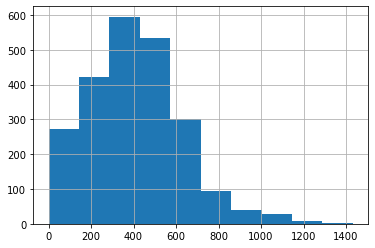

In [41]:
final_pivot.call_duration.hist()
print("Mean:", final_pivot.call_duration.mean())
print("Median:", final_pivot.call_duration.median())

For calls duration mean is quite close to median - this is typical for normalised distribution.

Mean: 33.166593981683384
Median: 26.0


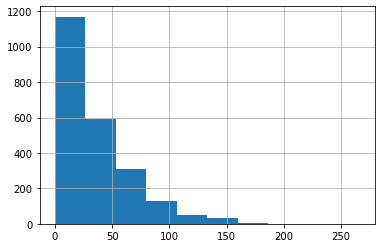

In [42]:
final_pivot.messages_amount.hist()
print("Mean:", final_pivot.messages_amount.mean())
print("Median:", final_pivot.messages_amount.median())

For messages the distribution is far from normal, meadian and mean are very different.

16.870475359790667
17.0


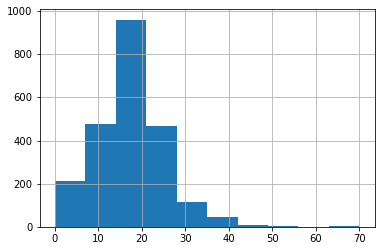

In [43]:
final_pivot.gb_used.hist()
print(final_pivot.gb_used.mean())
print(final_pivot.gb_used.median())

For internet usage the plot is very similar to normal distributon, the mean and median are almost the same.

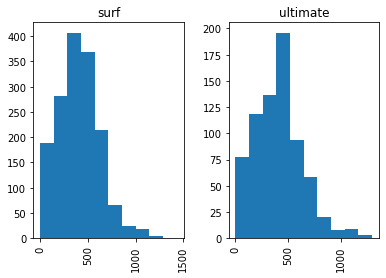

In [44]:
final_pivot.call_duration.hist(by=final_pivot['plan_name'])
plt.show()

Distributions for different plans look similar with maximum in different points. 

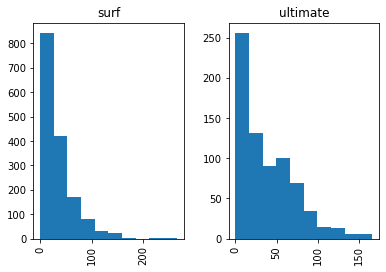

In [45]:
final_pivot.messages_amount.hist(by=final_pivot['plan_name'])
plt.show()

Distribution of messages for ultimate plan is more similar to normal with a right screw. Very few clients of surf tends to send messages compared to ultimate clients.

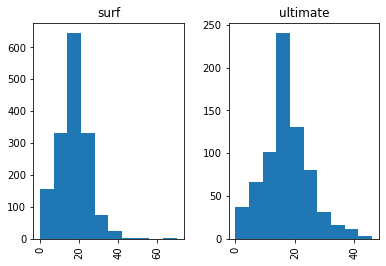

In [46]:
final_pivot.gb_used.hist(by=final_pivot['plan_name'])
plt.show()

Ultimate distribution looks more smilar to normal again. Maximums for both plans are the same. 

In [44]:
final_pivot.groupby(['plan_name'])['call_duration'].agg(['mean','median']).reset_index()

,plan_name,mean,median
0,surf,405.250477,402.0
1,ultimate,406.708333,399.0


In [45]:
final_pivot.groupby(['plan_name'])['messages_amount'].agg(['mean','median']).reset_index()

,plan_name,mean,median
0,surf,31.159568,24.0
1,ultimate,37.551389,30.0


In [46]:
final_pivot.groupby(['plan_name'])['gb_used'].agg(['mean','median']).reset_index()

,plan_name,mean,median
0,surf,16.670693,17.0
1,ultimate,17.306944,17.0


In [47]:
def trafic_stat(type):
    fig, ax = plt.subplots(figsize=(8,7))
    ax = sns.histplot(final_pivot, x=type, hue="plan_name")
    mean=final_pivot[type].mean()
    std=final_pivot[type].std()
    var=final_pivot[type].var()
    cv=std/mean
    plt.show()
    print("Average is",mean)
    print(final_pivot.groupby(['plan_name'])[type].mean())
    if cv>1:
        print("Varies a lot")
    else:
        print('Centered around average')

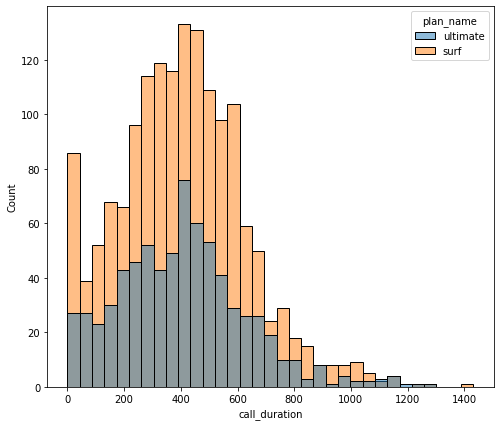

Average is 405.70824247710425
plan_name
surf        405.250477
ultimate    406.708333
Name: call_duration, dtype: float64
Centered around average


In [48]:
trafic_stat('call_duration')

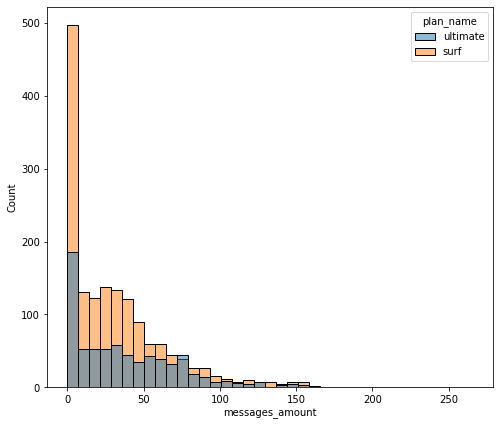

Average is 33.166593981683384
plan_name
surf        31.159568
ultimate    37.551389
Name: messages_amount, dtype: float64
Varies a lot


In [49]:
trafic_stat('messages_amount')

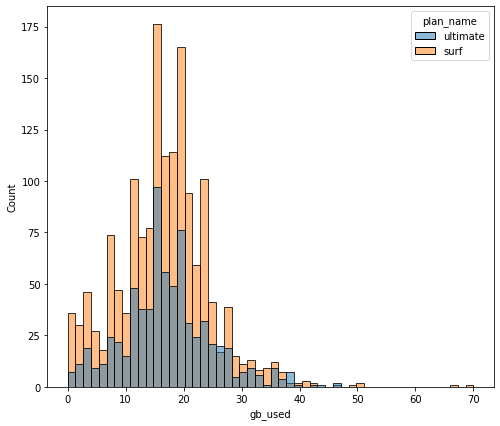

Average is 16.870475359790667
plan_name
surf        16.670693
ultimate    17.306944
Name: gb_used, dtype: float64
Centered around average


In [50]:
trafic_stat('gb_used')

## Test the hypotheses

Let's test the hypotheses that the average revenue from users of Ultimate and Surf calling plans are the same.

We'll take two samples of data (for two plans) and compare average revenue for them.

H0: average of sample 1 is equal to average of sample 2

H1: average of sample 1 is not equal to average of sample 2

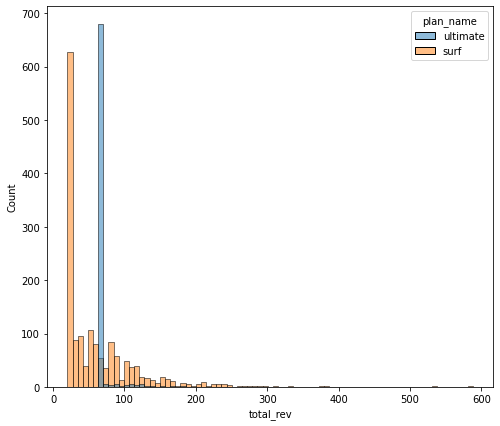

In [51]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.histplot(final_pivot, x="total_rev", hue="plan_name")

In [52]:
final_pivot.groupby(['plan_name'])['total_rev'].median()

plan_name
surf        40.15
ultimate    70.00
Name: total_rev, dtype: float64

In [53]:
surf=final_pivot.query('plan_name=="surf"')
ultimate=final_pivot.query('plan_name=="ultimate"')

In [54]:
sample1=surf['total_rev']
sample2=ultimate['total_rev']

In [55]:
sample1

1        20.00
2        20.00
3        90.09
4        60.00
5        60.00
         ...  
2282    180.18
2286     20.78
2287     40.66
2288     20.33
2289     20.00
Name: total_rev, Length: 1573, dtype: float64

In [56]:
print(len(sample1))
print(len(sample2))

1573
720


In [57]:
sample1.sample(700)

1202     20.00
951      20.00
1409     90.96
543     100.00
1247    260.00
         ...  
1156     81.74
1148    100.00
2216     20.00
958      20.00
961     160.00
Name: total_rev, Length: 700, dtype: float64

In [58]:
from scipy import stats
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=-5.7612805434369205, pvalue=9.470478215100237e-09)

In [59]:
# We will set level of critical statistical significance alpha equal to common level of 5%
alpha=0.05
def t_test(sample1,sample2,alpha=0.05):
    p_value=stats.ttest_ind(sample1, sample2).pvalue.astype(int)
    if p_value<alpha:
        print('Reject H0: average of sample 1 is not equal to average  sample 2')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 \
  and sample 2 are not the same") 

In [60]:
t_test(surf['total_rev'],ultimate['total_rev'],alpha=0.05)

Reject H0: average of sample 1 is not equal to average  sample 2


**Conclusion**: average revenues from users of Ultimate and Surf calling plans are different.

Next hypotheses we are going to test is that the average revenue from users in NY-NJ area is the same as for the users from other regions.

We'll take two samples of data (for two plans) and compare average revenue for them.

H0: average of sample 1 is equal to average of sample 2

H1: average of sample 1 is not equal to average of sample 2

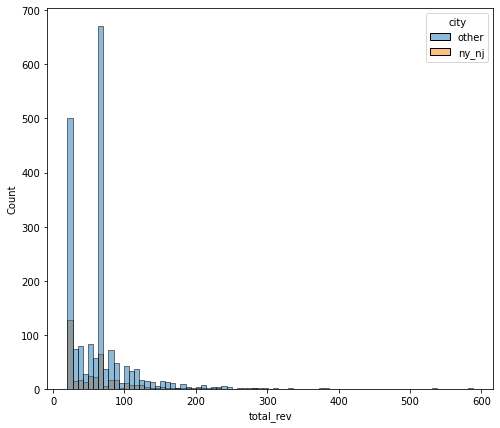

In [61]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.histplot(final_pivot, x="total_rev", hue="city")

In [62]:
final_pivot.groupby(['city'])['total_rev'].median()

city
ny_nj    51.08
other    70.00
Name: total_rev, dtype: float64

In [63]:
ny_nj=final_pivot.query('city=="ny_nj"')
other=final_pivot.query('city=="other"')

In [64]:
sample1=ny_nj['total_rev']
sample2=other['total_rev']

In [65]:
sample1

56       20.00
57       36.95
75       20.00
76      100.00
77       20.00
         ...  
2260    120.42
2261    170.27
2262    200.00
2263    110.33
2290     70.00
Name: total_rev, Length: 377, dtype: float64

In [66]:
print(len(sample1))
print(len(sample2))

377
1916


In [67]:
sample2.sample(377)

30      68.28
2144    40.00
402     91.64
873     70.00
254     70.00
        ...  
1608    20.00
388     50.00
1605    80.00
2175    20.00
716     70.00
Name: total_rev, Length: 377, dtype: float64

In [68]:
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=-2.0470417570370367, pvalue=0.04076784279879048)

In [69]:
# We will set level of critical statistical significance alpha equal to common level of 5%
alpha=0.05
def t_test(sample1,sample2,alpha=0.05):
    p_value=stats.ttest_ind(sample1, sample2).pvalue.astype(int)
    if p_value<alpha:
        print('Reject H0: average of sample 1 is not equal to average of sample 2')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 \
  and sample 2 are not the same") 

In [70]:
t_test(ny_nj['total_rev'],other['total_rev'],alpha=0.05)

Reject H0: average of sample 1 is not equal to average of sample 2


**Conclusion**: average revenues from users in NY-NJ area and for the users from other regions are different.

## Write an overall conclusion

We have addressed all possible issues identified in the data received: missing values, duplicates, data types.

Some missing data was identified - we considered corresponding column not relevant for our analysis so didn't fill this data in. 

For data with wrong data types we have changed them (from 'object' to 'date').

We have checked data for duplicates and dind't found any.

We have transformed initial datasets in order to calculate the monthly revenue for users of both tariff plans (merge several columns in one dataset and add a column with total monthly revenue calculated).

We have prepared hystograms for the dataset as a whole as well as for different tariff plans. The minutes, texts, and volume of data the users of each plan require per month were calculated. Then we have calculated mean, variance, and standard deviation in order to compare them for both tariff plans.

While testing call duration, amount of messages and gb used we identified that actually clients of different tariff plans uses very similar amount of minutes, messages and internet.

Hystograms describing average revenue from different tariffs and different cities show that there is a big difference between average revenue for tariff plans and for the cities compared.

Using t-test we have checked the hypotheses that average revenue from users of Ultimate and Surf calling plans are not the same (median for ultimate plan is almost twice bigger). 
We can conclude that ultimate plan is more profitable.

The second hypotheses we have checked is that the average revenue from users in NY-NJ area is the same as for the users from other regions. The result as that we reject this hypotheses - it means that NY-NJ is not so profitable as others.
